### 1. Collecting the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv("E:\Data Science\Assignments\Timeseries\Timeseries\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
# Converting DateTime format into Date format
df['date'] = pd.to_datetime(df['date'], format = 'mixed').dt.date

In [4]:
df.shape

(7588, 2)

In [5]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


### 2. Exploratory Data Analysis

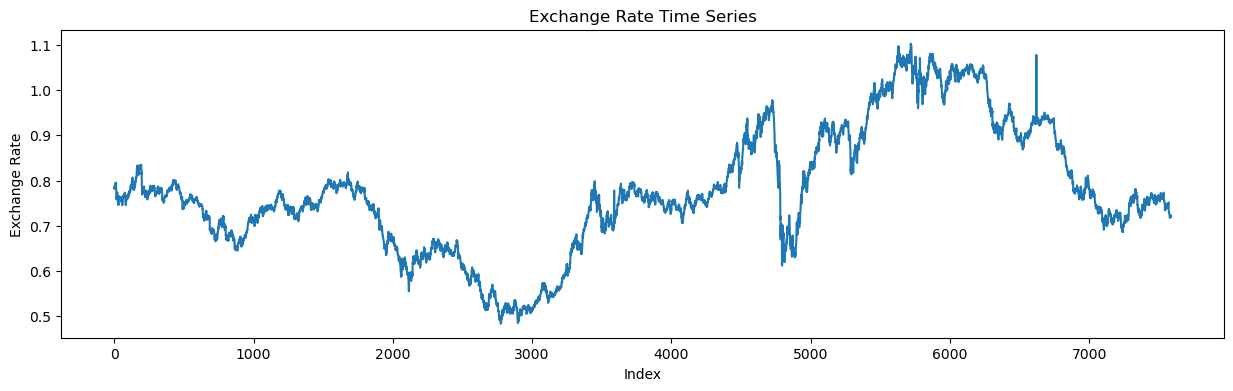

In [6]:
# Line plot of the Ex_rate
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))
sns.lineplot(df, x=df.index, y='Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Index')
plt.ylabel('Exchange Rate')
plt.show()
# We can observe that the data is non-stationary.

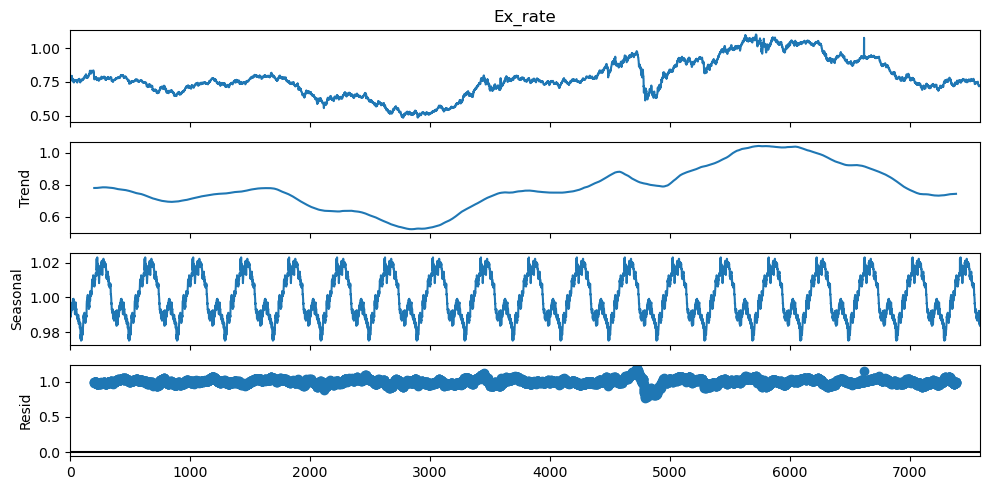

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
decompose_ts_add = seasonal_decompose(df.Ex_rate, model='multiplicative', period=400)
decompose_ts_add.plot()
plt.show()

In [8]:
# Here there are X variables in the dataset.
# Hence, we have to create the X variables
# t variable is the column which contains row number.
df['t'] = df.index + 1
df.head()

,date,Ex_rate,t
0,1990-01-01,0.7855,1
1,1990-02-01,0.7818,2
2,1990-03-01,0.7867,3
3,1990-04-01,0.7860,4
4,1990-05-01,0.7849,5


In [9]:
import numpy as np
df['log_ex_rate'] = np.log(df['Ex_rate'])
df.head()

,date,Ex_rate,t,log_ex_rate
0,1990-01-01,0.7855,1,-0.241435
1,1990-02-01,0.7818,2,-0.246156
2,1990-03-01,0.7867,3,-0.239908
3,1990-04-01,0.7860,4,-0.240798
4,1990-05-01,0.7849,5,-0.242199


In [10]:
df['t_square'] = df['t'] ** 2
df.head()

,date,Ex_rate,t,log_ex_rate,t_square
0,1990-01-01,0.7855,1,-0.241435,1
1,1990-02-01,0.7818,2,-0.246156,4
2,1990-03-01,0.7867,3,-0.239908,9
3,1990-04-01,0.7860,4,-0.240798,16
4,1990-05-01,0.7849,5,-0.242199,25


In [11]:
# Extracting month from the date column
df['month'] = pd.to_datetime(df['date']).dt.strftime('%b')
df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month
0,1990-01-01,0.7855,1,-0.241435,1,Jan
1,1990-02-01,0.7818,2,-0.246156,4,Feb
2,1990-03-01,0.7867,3,-0.239908,9,Mar
3,1990-04-01,0.7860,4,-0.240798,16,Apr
4,1990-05-01,0.7849,5,-0.242199,25,May


In [12]:
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month,year
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990
4,1990-05-01,0.7849,5,-0.242199,25,May,1990


In [13]:
list(df['month'].unique())

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [14]:
# One Hot Encoding
encoded_df = pd.get_dummies(df['month'], prefix='', dtype=int).sort_index(axis=1)
encoded_df

,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,0,0,0,0,0,0,1,0,0,0,0,0
7584,0,0,0,0,0,1,0,0,0,0,0,0
7585,0,1,0,0,0,0,0,0,0,0,0,0
7586,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
final_df = pd.concat([df, encoded_df], axis = 1)
final_df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.7849,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0


0.2611267376737365

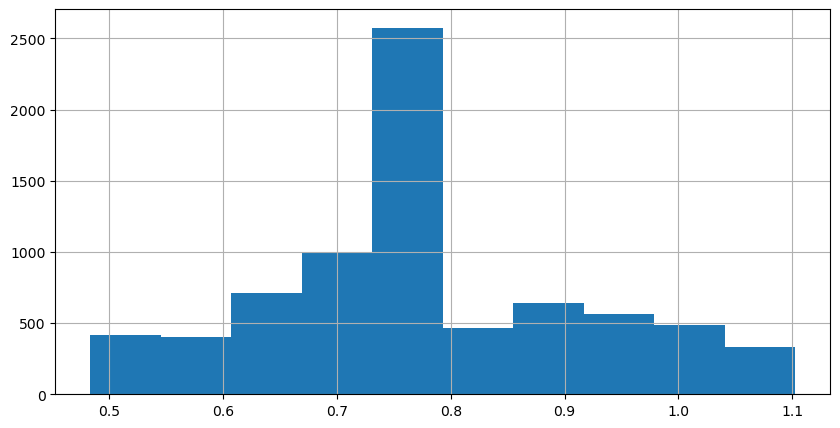

In [16]:
# histogram
df['Ex_rate'].hist()
df['Ex_rate'].skew()

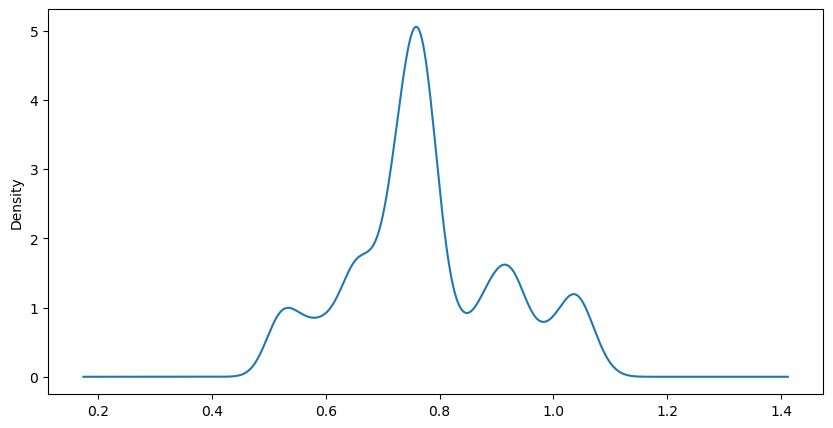

In [17]:
df['Ex_rate'].plot(kind='kde')
plt.show()

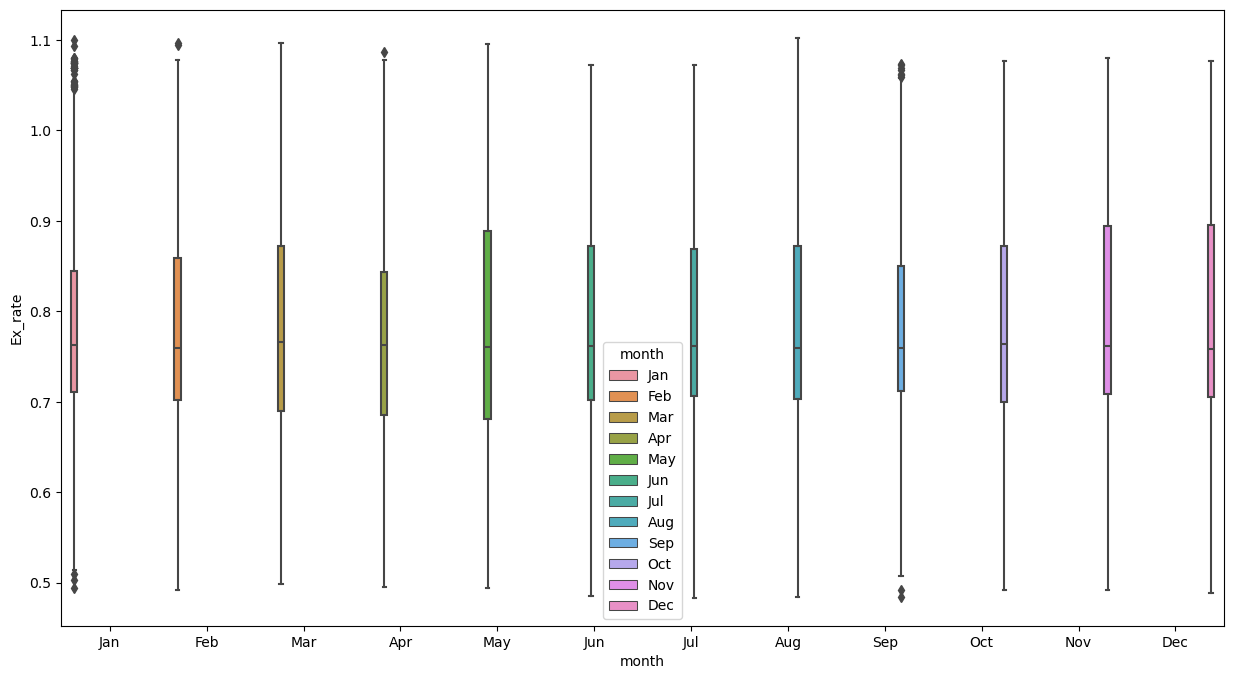

In [18]:
# Box plot of Ex_rate column monthly-wise
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_df, x = 'month', y='Ex_rate', hue='month')
plt.show()

This is the boxplot of the monthly-wise exchange rate, where outliers are prepsent in the months of Jan, Feb, Apr and Sep.

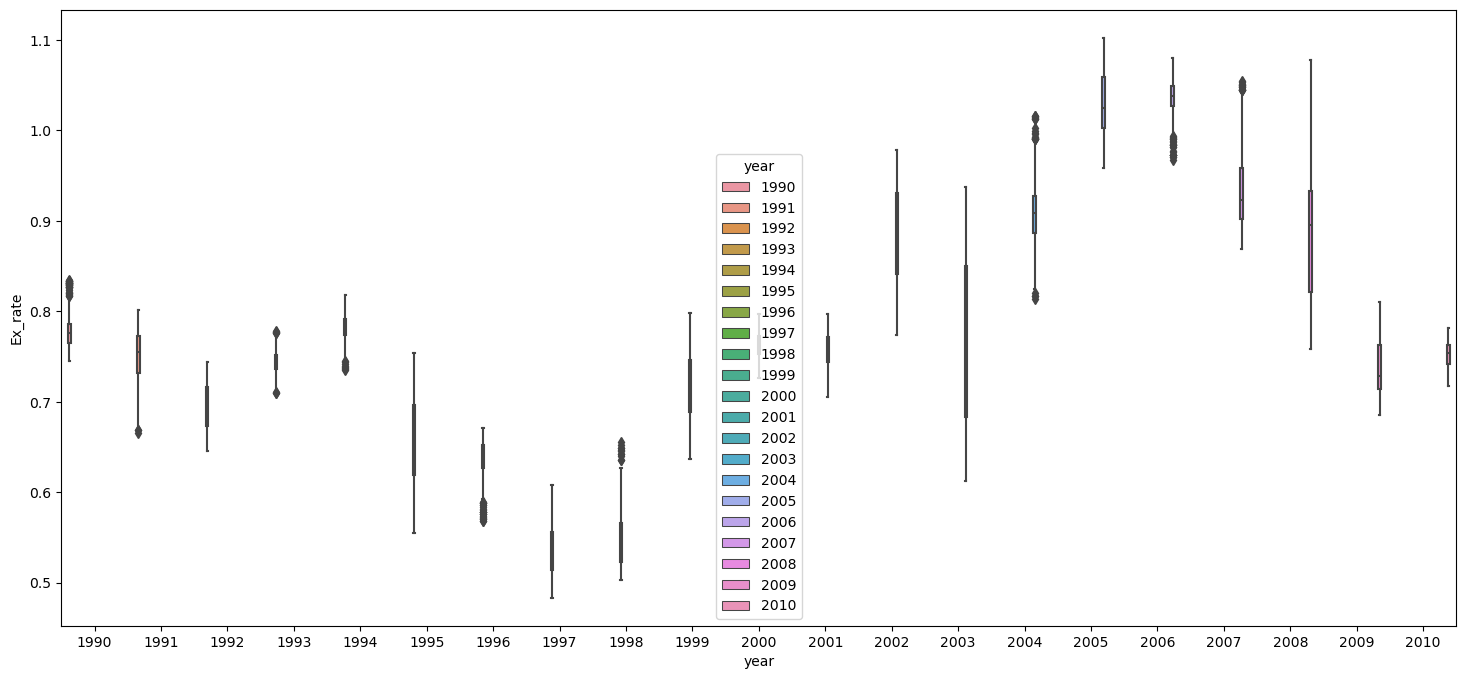

In [19]:
# Box plot of Ex_rate column Year-wise
plt.figure(figsize=(18, 8))
sns.boxplot(data=final_df, x = 'year', y='Ex_rate', hue='year')
plt.show()

This the boxplot of the Year-wise exchange rate, where outliers are present in the years 1990, 1991, 1993, 1994, 1996, 1998, 2004, 2006, and 2007.

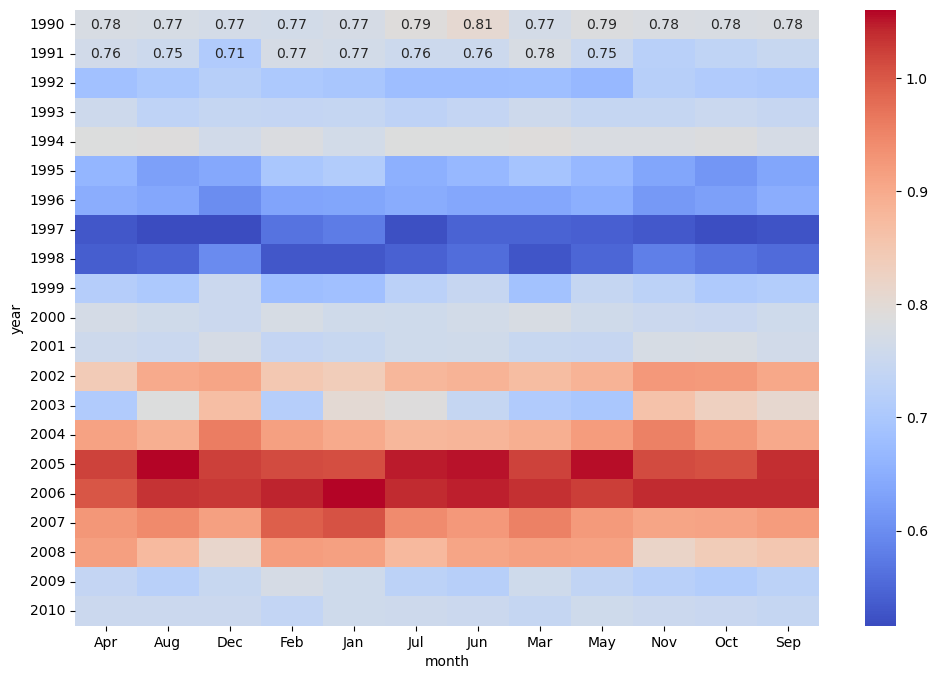

In [45]:
heat_map = pd.pivot_table(data=final_df, index='year', values='Ex_rate', columns='month')

plt.figure(figsize=(12, 8))
sns.heatmap(data=heat_map, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

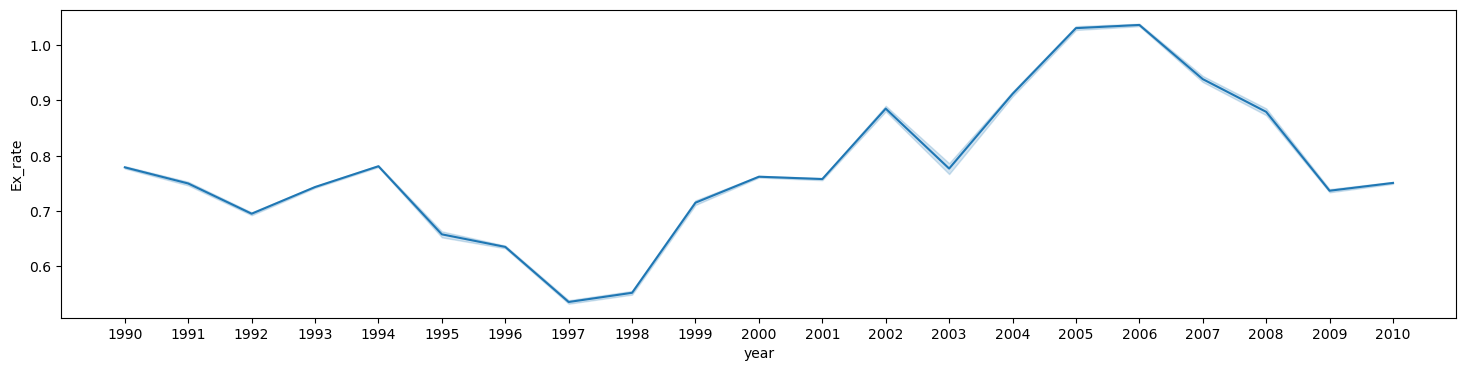

In [21]:
# Year-wise Line plot
plt.figure(figsize=(18, 4))
sns.lineplot(data=final_df, x='year', y='Ex_rate')
plt.show()

In [22]:
df['Ex_rate_diff'] = df['Ex_rate'].diff()

<Axes: >

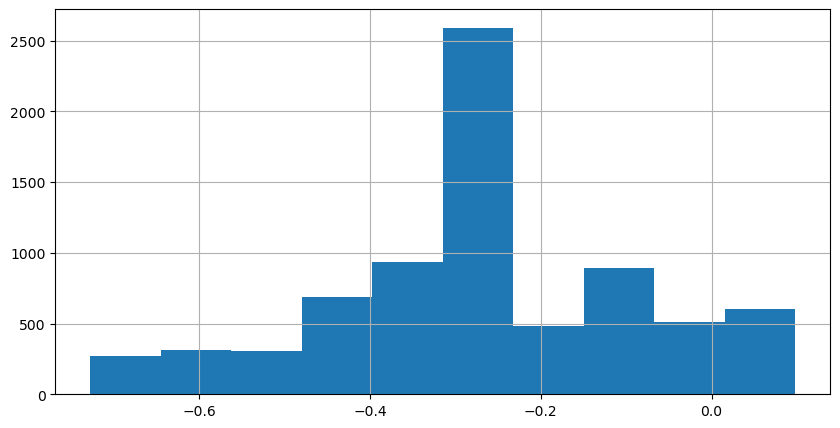

In [23]:
df['log_ex_rate'].hist()

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Ex_rate_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -99.39343120118626
p-value: 0.0


#### Autocorrelation and Partial Autocorrelation

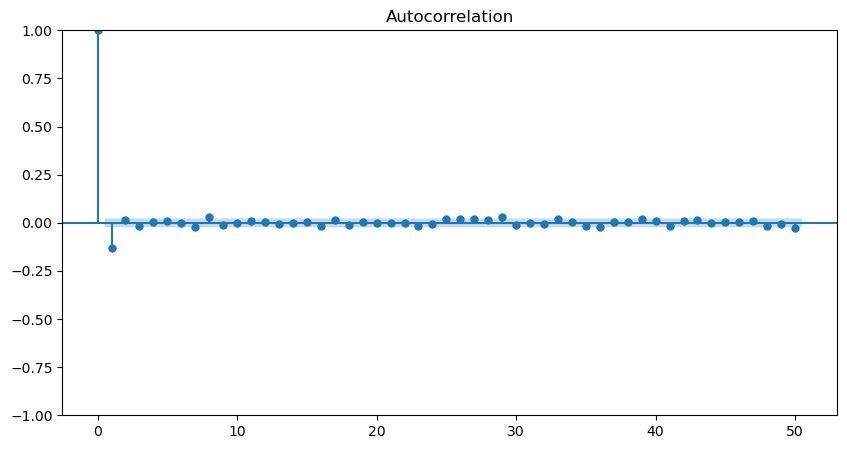

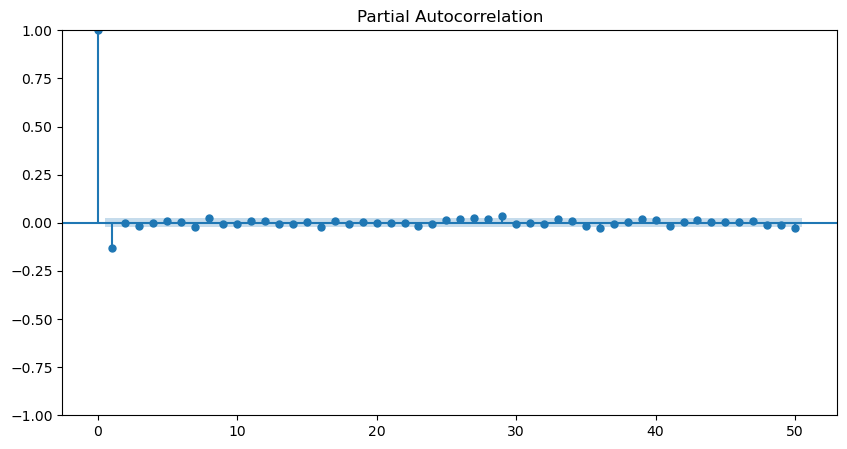

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate_diff'].dropna(), lags=50)
plt.show()

plot_pacf(df['Ex_rate_diff'].dropna(), lags=50)
plt.show()

#### Holt-Winter's Exponential Smoothing

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

smoothing_levels = np.linspace(0.1, 0.9, 9) 
smoothing_slopes = np.linspace(0.01, 0.1, 10)
best_params = None
best_rmse = float('inf')

for alpha in smoothing_levels:
    for beta in smoothing_slopes:
        model = Holt(df['Ex_rate'], exponential=True, damped=True)
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        predictions = model_fit.predict(start=0, end=len(df)-1)
        rmse = mean_squared_error(df['Ex_rate'], predictions, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (alpha, beta)

In [27]:
# Model fitting and forecating
model_holt = Holt(df['Ex_rate'], exponential=True, damped=True)
fitted_holt = model_holt.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])
predictions_holt = fitted_holt.predict(start=0, end=len(df)-1)

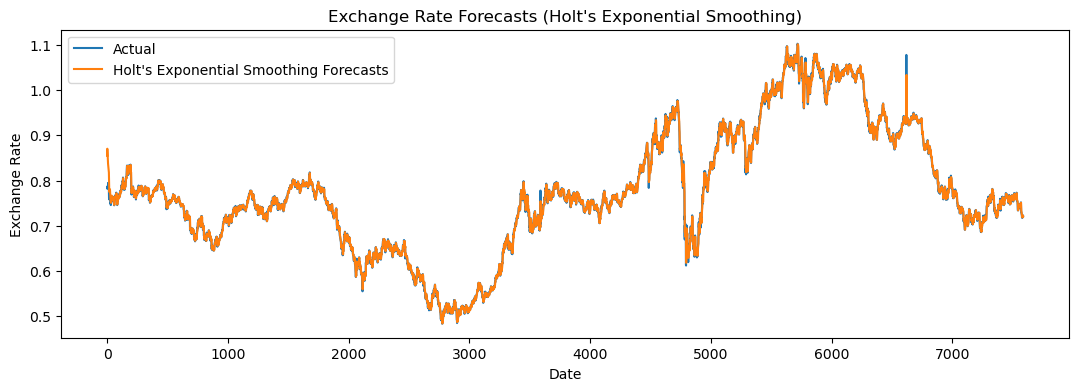

In [28]:
# Visualize the forecasts

plt.figure(figsize=(13, 4))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(predictions_holt, label='Holt\'s Exponential Smoothing Forecasts')
plt.title('Exchange Rate Forecasts (Holt\'s Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [29]:
final_df['Ex_rate'] = fitted_holt.fittedvalues

In [30]:
final_df

,date,Ex_rate,t,log_ex_rate,t_square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.782144,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.781474,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.778975,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.781950,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.782603,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,2010-06-10,0.718809,7584,-0.330598,57517056,Jun,2010,0,0,0,0,0,0,1,0,0,0,0,0
7584,2010-07-10,0.718497,7585,-0.325953,57532225,Jul,2010,0,0,0,0,0,1,0,0,0,0,0,0
7585,2010-08-10,0.720775,7586,-0.324074,57547396,Aug,2010,0,1,0,0,0,0,0,0,0,0,0,0
7586,2010-09-10,0.722430,7587,-0.327359,57562569,Sep,2010,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
mae_holt = mean_absolute_error(df['Ex_rate'], predictions_holt)
rmse_holt = mean_squared_error(df['Ex_rate'], predictions_holt, squared=False)
mape_holt = np.mean(np.abs((df['Ex_rate'] - predictions_holt) / df['Ex_rate'])) * 100

In [32]:
print('\nHolt\'s Exponential Smoothing:')
print('  MAE:', mae_holt)
print('  RMSE:', rmse_holt)
print('  MAPE:', mape_holt)


Holt's Exponential Smoothing:
  MAE: 0.003967482240618327
  RMSE: 0.006596592903994389
  MAPE: 0.5173798970026007


### ARIMA Model

### 3. Data Partition

In [33]:
Train = final_df[final_df['year'] <= '2009']
Test = final_df[final_df['year'] > '2009']

In [34]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(predictions_holt, order=(1,1,1))  # base model
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               30676.033
Date:                Thu, 22 Aug 2024   AIC                         -61346.067
Time:                        12:10:42   BIC                         -61325.264
Sample:                             0   HQIC                        -61338.928
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3490      0.030     11.601      0.000       0.290       0.408
ma.L1         -0.1770      0.030     -5.860      0.000      -0.236      -0.118
sigma2      1.798e-05   4.97e-08    361.631      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2849162.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model = ARIMA(predictions_holt, order=(2,1,2))  # base model
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               30677.635
Date:                Thu, 22 Aug 2024   AIC                         -61345.271
Time:                        12:10:43   BIC                         -61310.600
Sample:                             0   HQIC                        -61333.372
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.408     -0.113      0.910      -0.847       0.754
ar.L2          0.0397      0.156      0.254      0.799      -0.267       0.346
ma.L1          0.2177      0.408      0.533      0.594      -0.583       1.018
ma.L2          0.0351      0.092      0.382      0.702      -0.145       0.215
sigma2      1.797e-05   5.07e-08    354.726      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2841962.48
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Hyper parameter tuning

In [36]:
import itertools

p = [0, 1, 2, 4, 6]
d = range(0, 3)
q = range(0, 3)
optimal_params = None
min_aic = float('inf')

pdq = list(itertools.product(p, d, q))

for param in pdq:
    try:
        model = ARIMA(predictions_holt, order=param)
        results = model.fit()
        if results.aic < min_aic:
            optimal_params = param
        min_aic = min(min_aic, results.aic)
        
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

print(f'Best params: {optimal_params}, min_aic: {min_aic}')

ARIMA(0, 0, 0) - AIC:-8671.912789968332
ARIMA(0, 0, 1) - AIC:-18894.039968272387
ARIMA(0, 0, 2) - AIC:-27735.587413775087


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) - AIC:-61099.80828402072


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1) - AIC:-61316.379100780025
ARIMA(0, 1, 2) - AIC:-61349.27292099797


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0) - AIC:-57319.53739616691
ARIMA(0, 2, 1) - AIC:-60122.104069849905
ARIMA(0, 2, 2) - AIC:-60657.74447565373
ARIMA(1, 0, 0) - AIC:-61099.61267289059


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1) - AIC:-61316.83810029188
ARIMA(1, 0, 2) - AIC:-61349.998212510895
ARIMA(1, 1, 0) - AIC:-61340.13464892292
ARIMA(1, 1, 1) - AIC:-61346.06690766178


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) - AIC:-61347.20501458812


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0) - AIC:-58881.58158386372
ARIMA(1, 2, 1) - AIC:-60361.372175673896
ARIMA(1, 2, 2) - AIC:-60551.78448050447


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0) - AIC:-61340.774842735205
ARIMA(2, 0, 1) - AIC:-61346.608491356004


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) - AIC:-61347.966117372795


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0) - AIC:-61347.51201717043
ARIMA(2, 1, 1) - AIC:-61347.08927164991
ARIMA(2, 1, 2) - AIC:-61345.27084732338
ARIMA(2, 2, 0) - AIC:-59437.91476845557


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1) - AIC:-61304.365625657585
ARIMA(2, 2, 2) - AIC:-60774.92390509444
ARIMA(4, 0, 0) - AIC:-61347.85066539627


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 1) - AIC:-61343.96731069825
ARIMA(4, 0, 2) - AIC:-61237.212021756495
ARIMA(4, 1, 0) - AIC:-61345.43147819639
ARIMA(4, 1, 1) - AIC:-61343.313990785144
ARIMA(4, 1, 2) - AIC:-61341.13575208541
ARIMA(4, 2, 0) - AIC:-60107.70893495565


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 1) - AIC:-61281.40342066607
ARIMA(4, 2, 2) - AIC:-60736.71177873334
ARIMA(6, 0, 0) - AIC:-61345.07930218457
ARIMA(6, 0, 1) - AIC:-61342.65553644649
ARIMA(6, 0, 2) - AIC:-61341.10004696048
ARIMA(6, 1, 0) - AIC:-61342.38365728791


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 1) - AIC:-61340.25275861871


c:\Users\SAI VARDHAN REDDY\anaconda3\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 2) - AIC:-61338.40055601333
ARIMA(6, 2, 0) - AIC:-60374.7394963418
ARIMA(6, 2, 1) - AIC:-60304.67095310145
ARIMA(6, 2, 2) - AIC:-60689.666658666334
Best params: (1, 0, 2), min_aic: -61349.998212510895


In [37]:
# Best model based on grid search

model = ARIMA(predictions_holt, order=optimal_params)
fitted_ARIMA = model.fit()  
fitted_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 0, 2)   Log Likelihood               30679.999
Date:                Thu, 22 Aug 2024   AIC                         -61349.998
Time:                        12:12:24   BIC                         -61315.327
Sample:                             0   HQIC                        -61338.099
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7771      0.081      9.617      0.000       0.619       0.935
ar.L1          0.9993      0.000   2260.633      0.000       0.998       1.000
ma.L1          0.1720      0.002     73.585      0.000       0.167       0.177
ma.L2          0.0675      0.006     11.338      0.000       0.056       0.079
sigma2      1.796e-05   5.12e-08    350.696      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2848657.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The above model has the lowest AIC score, and the P>|z| for all the weights are below 0.05, so it is reasonable to retain all of them in our model.

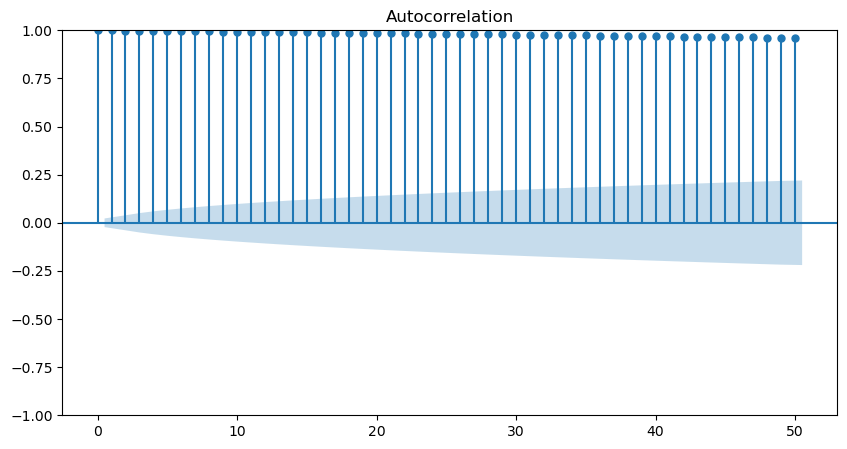

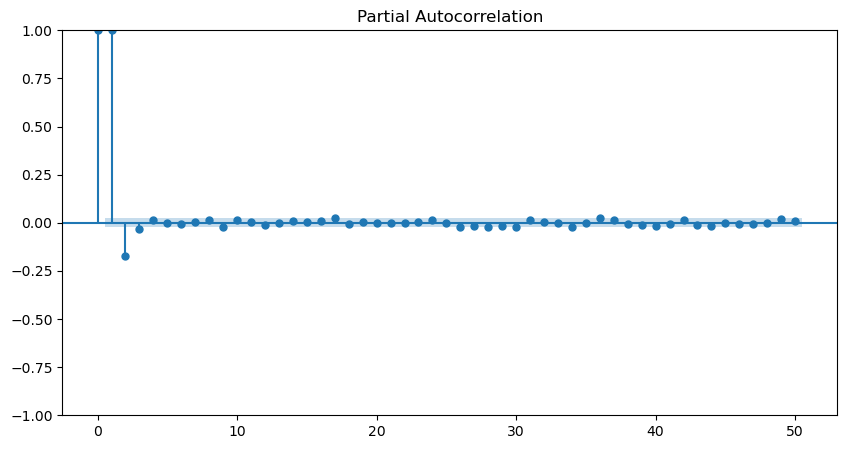

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(predictions_holt, lags=50)
plt.show()
plot_pacf(predictions_holt, lags=50)
plt.show()

In [39]:
forecast = fitted_ARIMA.predict(start=len(Train), end=len(final_df) - 1)

In [40]:
mae_arima = mean_absolute_error(Test['Ex_rate'], forecast)  # Use your ARIMA predictions from before
rmse_arima = mean_squared_error(Test['Ex_rate'], forecast, squared=False)
mape_arima = np.mean(np.abs((Test['Ex_rate'] - forecast) / Test['Ex_rate'])) * 100

In [41]:
print('ARIMA Model:')
print('  MAE:', mae_arima)
print('  RMSE:', rmse_arima)
print('  MAPE:', mape_arima)

ARIMA Model:
  MAE: 0.0021406859839555397
  RMSE: 0.0030706029121060976
  MAPE: 0.2851381147962232


Holt's Exponential Smoothing:
  1. MAE: 0.003967482236734203
  2. RMSE: 0.006596592836387231
  3. MAPE: 0.5173798965179196

ARIMA Model:
  1. MAE: 0.004375973322762413
  2. RMSE: 0.005844767982948082
  3. MAPE: 0.5830254355571421

Comparing the MAE, RMSE, and MAPE values of the ARIMA model and Holt's Smoothing model are very close to each other.

As the value of MAPE value 0.58% which is better model.

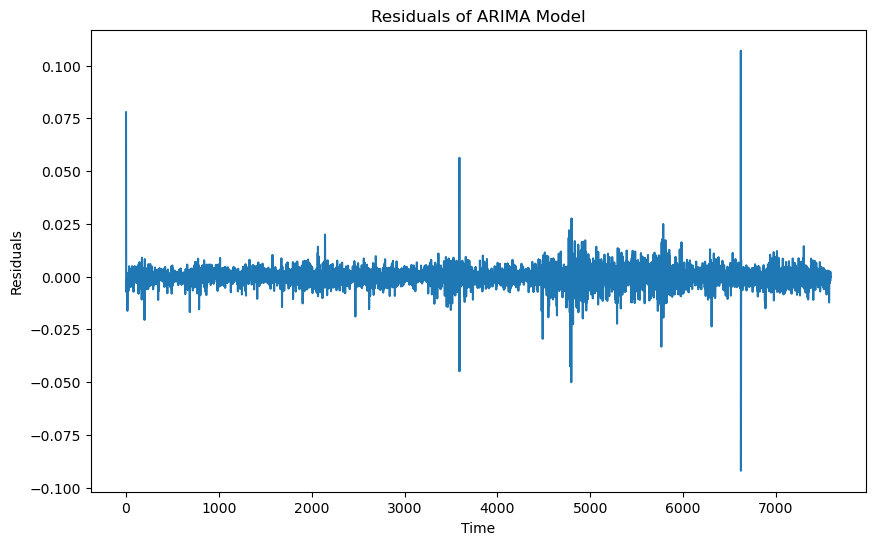

In [42]:
residuals = fitted_ARIMA.resid 
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

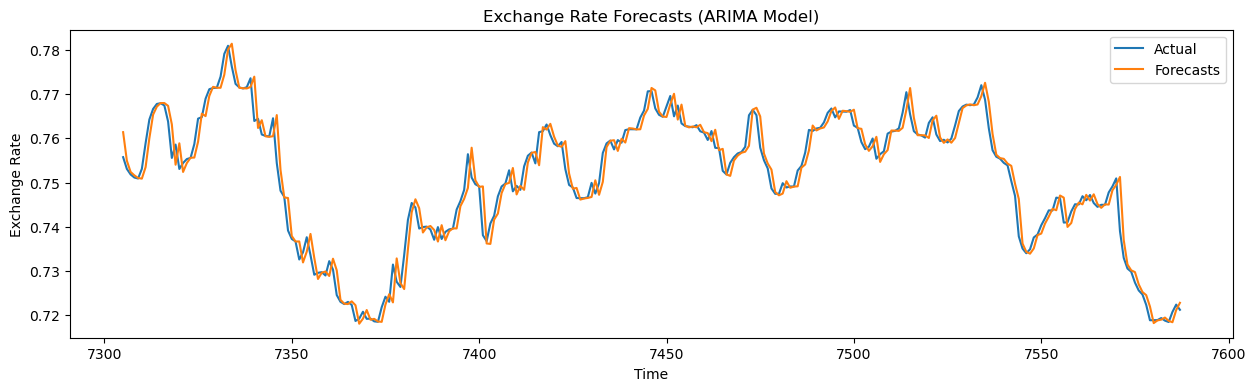

In [43]:
plt.figure(figsize=(15, 4))
plt.plot(Test.Ex_rate, label='Actual')
plt.plot(forecast, label='Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

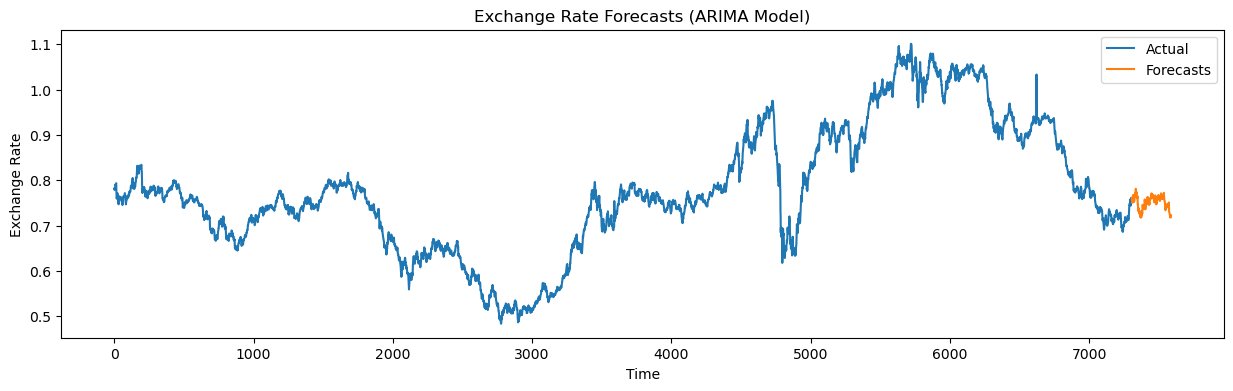

In [44]:
plt.figure(figsize=(15, 4))
plt.plot(Train.Ex_rate, label='Actual')
plt.plot(forecast, label='Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In the above graph, the orange line represents the predicted values of the ARIMA model which is continue of the Train data.